# Exercise 1

In [12]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1


1. Represent the following directed graph by means of (a) and adjacency matrix and (b) and adjacency list.

In [ ]:
#Adyacency matrix
adj_matrix = np.array([[0,1,0,0,1,0,0,0,0,1], 
                       [0,0,0,0,0,0,0,0,0,0],
                       [0,0,0,1,0,0,0,0,0,0],
                       [0,1,0,0,1,0,0,0,0,0],
                       [1,0,0,0,0,0,0,0,0,0],
                       [0,0,0,0,0,0,0,0,1,1],
                       [0,0,0,0,0,1,0,1,1,0],
                       [0,0,0,0,0,0,0,0,0,0],
                       [0,0,0,0,0,1,0,1,0,0],
                       [1,0,0,0,0,1,0,0,0,0]])
print(adj_matrix)

#Adjacency list
adj_list = np.array([[1, 2, 5, 10],
                     [2],
                     [3, 4],
                     [4, 2, 5],
                     [5, 1],
                     [6, 9, 10],
                     [7, 6, 8, 9],
                     [8],
                     [9, 6, 8], 
                     [10, 1, 6]])
print(adj_list)

2. Reply the following questions:

 a. Is it weighted?
    No. There is not labels associated to edges.

 b. Is it connected?
   It's not (strongly) connected because, for instance, there is not a path between vertex 2 to vertex 4.

 c. Is it weakly connected?
    Yes, because if we assume all the edges as indirected, it's possible find a path between every pair of vertex.

 d. Which are its order and size? The order is the cardinal of the set of vertex, so **order = 10**. The size is the cardinal of the set of edges, son **size = count of ones in adjacency matrix = 16**

 e. Has it any articulation point?. If so, indicate such point. Yes, 4, 5, 1, 10, 6. By the removal of 4, 3 cannot reach 2 by any path, for instance. By the removal of 5, 4 cannot reach 1, by the removal of 1, 5 cannot reach 10. By the removal of 10, 1 cannot reach 6, and by the removal of 6, 10 cannot reach 9.
 
 f. Has it loops?
 No, there are no edges connecting nodes with themselves.
 
 g. Has it cycles? If so, indicate which.
 Yes: 1-5, 1-10, 10-6.
 
 h. Does it exists a path between nodes 4 and 7? If so, indicate it and its length. Doesn't exists any path.

 i. Does it exists a path between nodes 3 y 9? If so, indicate it and its length.
 Yes: 3->4->5->1->10->6->9, with length 6.
 
 
3. Consider now the graph as a undirected graph.

    a. Has it cycles? If so, indicate which.
        Yes 4-2-1-5, 6-9-8-7, 6-9-7, 9-8-7.
    
    b. Indicate the highest k for which a k-core exist.
        k = 3. There are one 3-core graph, the graph formed by vertex 9, 6, 7, all of then with degree 3.
        
    c. Compute the clustering index of node 10.
    It has 2 neighbors: 6 and 1, not connected, so the clustering index is 0.
    
    d. Compute the characteristic path of node 10.
    
    L = (d(10,1) + d(10,2) + d(10,3) + d(10,4) + d(10,5) + d(10,6) + d(10,7) + d(10,8) + d(10,9)) / 9 = (1 + 2 + 4 + 3 + 2 + 1 + 2 + 3 + 2) / 9 = 20/9
    
    e. Does it exists a clique with order higher than 2? If so, indicate the nodes in the clique.
    Yes, two order three cliques: (6,9,7) and (9,8,7)
 

## Section 2. Analysis of a protein interaction networks by means of NetworkX.

1. Download the CaernoElegans-LC_uw.txt graph from Moodle, the graph contains a protein interaction network corresponding to the Caernobidis Elegans worm.

2. The file that contains the network is in edge list format, therefore, load the graph in a
variable G_CE using the function read_edgelist ("CL-LC_uw.txt").

3. Obtain and print the order and size of the graph by the output and find out whether
the graph is directed or not. Is it a dense or sparse graph?

4. Create a random graph G_AL that has the same order and size as the graph that you
just loaded using the function gnp_random_graph (n, m).

5. Tell if both graphs are connected..

6. Compute the number of connected components of each graph.

7. What is the node with the highest grade in each graph?

8. What is the node with the highest betweeness?

9. What is the node with the highest closeness?

10. What is the node with the highest distance between two nodes in the graph (graph diameter)?

In [63]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  
G_CE = nx.read_edgelist("CaernoElegans-LC_uw.txt")
order = G_CE.order()
size = G_CE.size()
print("3. Order", order)
print("3. Size", size)
print("3. Is directed?",G_CE.is_directed())

density = 2 * size / (order*(order-1))
print(density, nx.density(G_CE))
if density <= 0.1: 
    density_type = "sparse"
elif density >= 0.9: 
    density_type = "dense"
else: 
    density_type = "not evaluable"
print("3. Is dense or sparse?", density_type)
#4. Random graph generation
G_AL = nx.gnm_random_graph(order, size)

order = G_AL.order()
size = G_AL.size()
print("4. Order", order)
print("4. Size", size)

print("5. Is connected G_CE?", nx.is_connected(G_CE))
print("5. Is connected G_AL?", nx.is_connected(G_AL))

#6. Compute the number of connected components of each graph.
print("Number of connected components G_CE", nx.number_connected_components(G_CE))
print("Number of connected components G_AL", nx.number_connected_components(G_AL))
#[e for e in G.edges]

#7. What is the node with the highest grade in each graph?
def get_max_degree(graph):
    max_degree = 0
    node_max_degree = 0
    for (node, degree) in nx.degree(graph):
        if degree > max_degree:
            max_degree = degree
            node_max_degree = node
    return max_degree, node_max_degree

max_degree, node_max_degree = get_max_degree(G_CE)
print("7. G_CE: Max degree:", max_degree, "Node max degree:", node_max_degree)

max_degree, node_max_degree = get_max_degree(G_AL)
print("7. G_AL: Max degree:", max_degree, "Node max degree:", node_max_degree)

3. Order 1387
3. Size 1648
3. Is directed? False
0.001714539566017576 0.001714539566017576
3. Is dense or sparse? sparse
4. Order 1387
4. Size 1648
5. Is connected G_CE? False
5. Is connected G_AL? False
Number of connected components G_CE 89
Number of connected components G_AL 157
7. G_CE: Max degree: 131 Node max degree: T08G11.5
7. G_AL: Max degree: 10 Node max degree: 1117


In [71]:
#8. What is the node with the highest betweeness?
def get_node_max_betweeness(graph):
    node_max_betweeness = 0
    max_betweeness = 0.0
    for node,betweeness in nx.betweenness_centrality(graph).items():
        #print((node, betweeness))
        if betweeness > max_betweeness:
            max_betweeness = betweeness
            node_max_betweeness = node
    return node_max_betweeness, max_betweeness

node_max_betweeness, max_betweeness = get_node_max_betweeness(G_CE)
print("8. G_CE: Max betweeness:", max_betweeness, "Node max betweeness:", node_max_betweeness)

node_max_betweeness, max_betweeness = get_node_max_betweeness(G_AL)
print("8. G_AL: Max betweeness:", max_betweeness, "Node max betweeness:", node_max_betweeness)


8. G_CE: Max betweeness: 0.08356781880879106 Node max betweeness: C23G10.4
8. G_AL: Max betweeness: 0.034320785941466675 Node max betweeness: 1134


In [72]:
#9. What is the node with the highest closeness?
def get_node_max_closeness(graph):
    node_max_closeness = 0
    max_closeness = 0.0
    for node,closeness in nx.closeness_centrality(graph).items():
        #print((node, closeness))
        if closeness > max_closeness:
            max_closeness = closeness
            node_max_closeness = node
    return node_max_closeness, max_closeness

node_max_closeness, max_closeness = get_node_max_closeness(G_CE)
print("9. G_CE: Max closeness:", max_closeness, "Node max closeness:", node_max_closeness)

node_max_closeness, max_closeness = get_node_max_closeness(G_AL)
print("9. G_AL: Max closeness:", max_closeness, "Node max closeness:", node_max_closeness)


9. G_CE: Max closeness: 0.13008480872167205 Node max closeness: W10C8.2
9. G_AL: Max closeness: 0.14221588480822686 Node max closeness: 117


In [131]:
#10. What is the node with the highest distance between two nodes in the graph (graph diameter)?
def get_node_max_distance(graph):
    """
    Returns the pair of nodes and the distance for the nodes with greater distance
    If there are more than a pair with equal max distance, the method returns the last found node
    """
    node_max_distance = 0
    other_node_max_distance = 0
    max_distance = 0
    for (node, distances) in nx.all_pairs_shortest_path_length(graph):
        for other_node in distances.keys():
            if distances[other_node] > max_distance:
                max_distance = distances[other_node]
                node_max_distance = node
                other_node_max_distance = other_node
    return node_max_distance, other_node_max_distance, max_distance  

def get_diameter(graph):
    """
    Returns the diameter of the graph if the graph is connected, otherwise returns the diameter
    of largest subgraph, because nx.diameter returns error if graph is not connected
    """
    if nx.is_connected(graph):
        return nx.diameter(graph)
    else:
        # Calculate max connected set of nodes
        largest_cc = max(nx.connected_components(graph), key=len)   
        # Compute subgraph for the set of nodes
        largest_connected_subgraph = graph.subgraph(largest_cc)
        return nx.diameter(largest_connected_subgraph)

node_max_distance, other_node_max_distance, max_distance = get_node_max_distance(G_CE)
print("10. G_CE: Max distance(diameter):", max_distance, 
      "Nodes max distance:", node_max_distance, other_node_max_distance)

node_max_distance, other_node_max_distance, max_distance = get_node_max_distance(G_AL)
print("10. G_AL: Max distance(diameter):", max_distance, 
      "Nodes max distance:", node_max_distance, other_node_max_distance)

#Another way (only diameter), slower
print("10. G_CE: Max distance(diameter):", get_diameter(G_CE))
print("10. G_AL: Max distance(diameter):", get_diameter(G_AL))

10. G_CE: Max distance(diameter): 22 Nodes max distance: F52A8.2 Y50D4C.1
10. G_AL: Max distance(diameter): 19 Nodes max distance: 377 499
10. G_CE: Max distance(diameter): 22
10. G_AL: Max distance(diameter): 19


## Section 3. Node degree distribution.

1. Plot the node degree distribution of both graphs.

2. Are the node degree distribution of both graphs the same?, What conclusion do you
draw from the above?

3. Now draw the node degree distribution of the protein interaction network using logarithmic scale in both axes, add these two lines of code to change the type of scale in each axis.

```python
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')
```

4. What kind of plot do you get? Could you roughly calculate the slope of the data?

In [ ]:
G=nx.MultiGraph(name="Network")
G.add_edges_from([(0,1),(1,2),(2,3)])
print(G.nodes)
print(G.edges)
G.nodes[1]["nombre"]="IT34"
print(G.graph)
print(G.nodes[1])
nx.draw_circular(G)

[0, 1, 2, 3, 4, 5, 6, 7]
[(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (3, 5), (3, 4), (4, 6), (5, 7), (5, 6), (6, 7)]
{'nombre': 'IT34'}



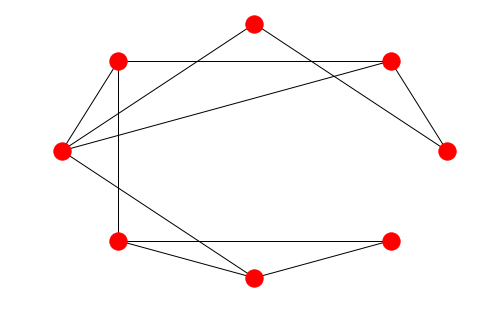

In [17]:
import networkx as nx
G=nx.Graph(nombre='Red Genética')
G.add_nodes_from([0,1,2,3,4,5,6,7])
G.add_edges_from([(0,1),(0,2),(1,3),(2,4),(3,5),(4,6),(5,7),(6,7),
(1,4),(3,4),(5,6)])
G.nodes[1]["nombre"]="IT34"
print(G.nodes)
print(G.edges)
print(G.nodes[1])
print(G)
nx.draw_circular(G)


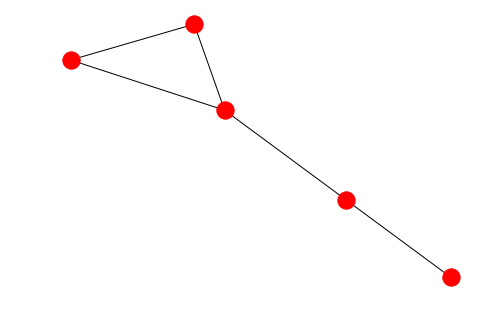

In [58]:
G_TEST = nx.gnm_random_graph(3, 3)
i = 0
for a in nx.all_pairs_shortest_path_length(G_TEST):
    print(i, a)
    print("#########")
    
def get_node_max_distance(graph):
    node_max_distance = 0
    other_node_max_distance = 0
    max_distance = 0
    for (node, distances) in nx.all_pairs_shortest_path_length(graph):
        for other_node in distances.keys():
            if distances[other_node] > max_distance:
                max_distance = distances[other_node]
                node_max_distance = node
                other_node_max_distance = other_node
    return node_max_distance, other_node_max_distance, max_distance  

node_max_distance, other_node_max_distance, max_distance = get_node_max_distance(G_TEST)
print("10. G_TEST: Max distance:", max_distance, "Nodes max distance:", node_max_distance, other_node_max_distance)


[0, 1, 2, 3, 4, 5, 6, 7]
[]


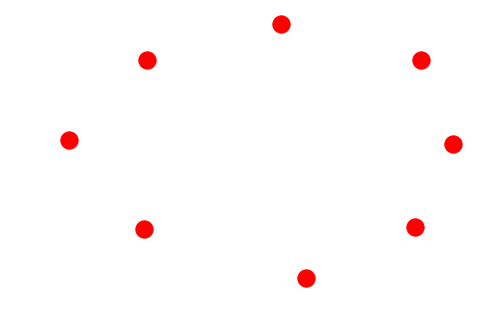

In [40]:
import networkx as nx
G=nx.Graph()
H=nx.complete_graph(8)
#nx.draw(H)
G.add_nodes_from(H)
#G.add_edges_from([(0,1),(0,2),(1,3),(2,4),(3,5),(4,6),(5,7),(6,7),(1,4),(3,4),(5,6)])
print(G.nodes)
print(G.edges)
nx.draw(G)

[0, 1, 2, 3, 4]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]


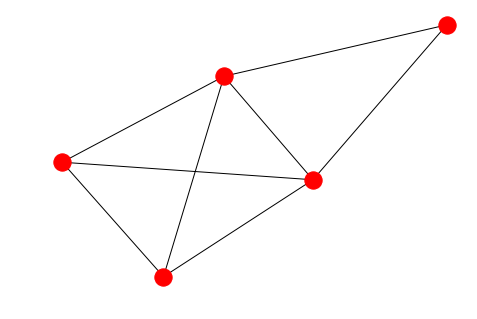

In [45]:
G=nx.gnp_random_graph(5,0.7)
print(G.nodes)
print(G.edges)
nx.draw(G)

[0, 1, 2, 3, 4]
[(2, 3)]


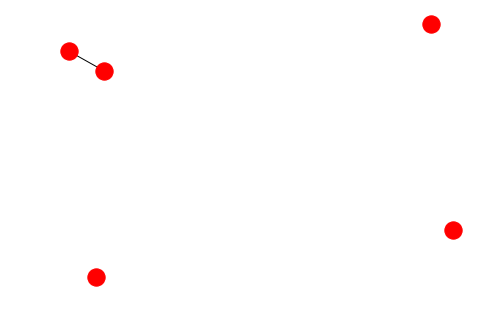

In [46]:
G=nx.gnm_random_graph(5,1)
print(G.nodes)
print(G.edges)
nx.draw(G)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[(0, 5), (0, 6), (0, 3), (1, 5), (1, 6), (1, 2), (1, 3), (2, 8), (2, 7), (3, 6), (4, 7), (4, 5), (4, 8), (4, 6), (5, 6), (5, 8), (6, 7), (7, 8)]


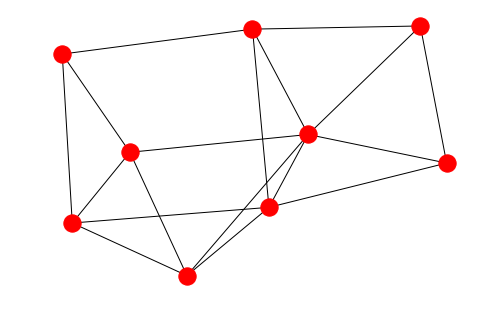

In [49]:
G=nx.watts_strogatz_graph(9, 5, 1)
print(G.nodes)
print(G.edges)
nx.draw(G)

[0, 1, 2, 3, 4, 5]
[(0, 5), (1, 5), (2, 5), (3, 5), (4, 5)]


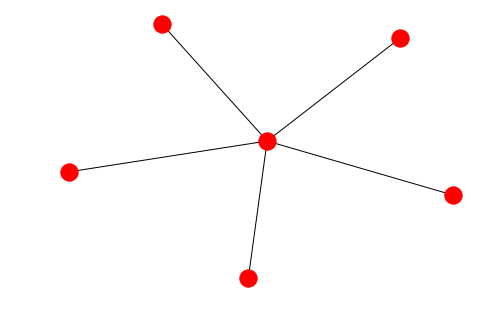

In [51]:
G=nx.barabasi_albert_graph(6, 5, 1)
print(G.nodes)
print(G.edges)
nx.draw(G)

In [67]:
%%writefile data.txt
0 1 2 #a comment
1 0 3 4
2 0 4
3 1 4 5
4 1 2 3 6 # another comment
5 3 6 7
6 4 5 7
7 5 6
8 1

Overwriting data.txt


['0', '1', '2', '3', '4', '5', '6', '7', '8']
[('0', '1'), ('0', '2'), ('1', '3'), ('1', '4'), ('1', '8'), ('2', '4'), ('3', '4'), ('3', '5'), ('4', '6'), ('5', '6'), ('5', '7'), ('6', '7')]


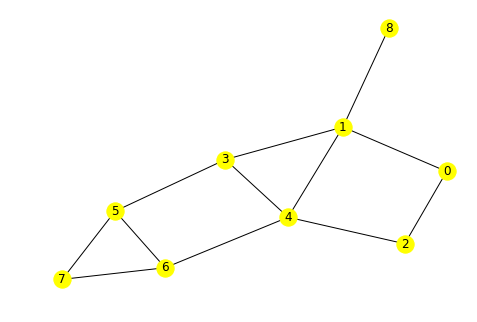

In [73]:
import networkx as nx
G = nx.read_adjlist("data.txt")
print(G.nodes)
print(G.edges)
nx.draw(G, with_labels = True, node_color = "yellow")

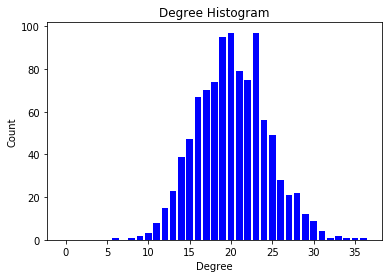

In [79]:
G = nx.gnp_random_graph(1000, 0.02)
L=nx.degree_histogram(G)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

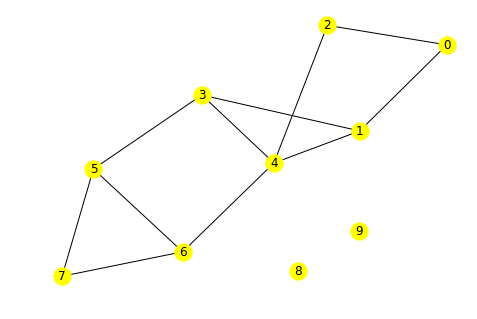

In [90]:
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])
G.add_edges_from([(0,1),(0,2),(1,3),(2,4),(3,5),(4,6),(5,7),(6,7),
(1,4),(3,4),(5,6)])
#probad diferentes layouts aquí
nx.draw_kamada_kawai(G, with_labels = True, node_color = "yellow")
#nx.draw_spring(G, with_labels = True, node_color = "yellow")
#nx.draw_spectral(G, with_labels = True, node_color = "yellow")
#nx.draw_shell(G, with_labels = True, node_color = "yellow")
#nx.draw_circular(G, with_labels = True, node_color = "yellow")